In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout


In [117]:
img_height,img_width=128,128
batch_size=28

In [118]:
train_datagen=ImageDataGenerator(rescale=1.0/255.0,
                                 validation_split=0.2)

In [119]:
train_data=train_datagen.flow_from_directory('data',
                                             target_size=(img_height,img_width),
                                             batch_size=batch_size,
                                             class_mode="categorical",
                                             subset="training")
validation_data=train_datagen.flow_from_directory('data',
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode="categorical",
                                                subset="validation")

Found 4505 images belonging to 4 classes.
Found 1126 images belonging to 4 classes.


In [120]:
model=Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=(img_height,img_width,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation="relu"),
    Dropout(0.5),
    Dense(train_data.num_classes,activation="softmax")
])

In [121]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [122]:
history=model.fit(train_data,epochs=25,steps_per_epoch=100,validation_data=validation_data)

Epoch 1/25
100/100 [==============================] - 78s 762ms/step - loss: 0.6523 - accuracy: 0.6854 - val_loss: 0.4311 - val_accuracy: 0.8171
Epoch 2/25
100/100 [==============================] - 73s 730ms/step - loss: 0.4192 - accuracy: 0.8266 - val_loss: 0.3163 - val_accuracy: 0.8686
Epoch 3/25
100/100 [==============================] - 73s 732ms/step - loss: 0.3681 - accuracy: 0.8502 - val_loss: 0.3091 - val_accuracy: 0.8766
Epoch 4/25
100/100 [==============================] - 73s 734ms/step - loss: 0.4038 - accuracy: 0.8355 - val_loss: 0.3678 - val_accuracy: 0.8579
Epoch 5/25
100/100 [==============================] - 73s 726ms/step - loss: 0.4073 - accuracy: 0.8336 - val_loss: 0.3404 - val_accuracy: 0.8623
Epoch 6/25
100/100 [==============================] - 72s 721ms/step - loss: 0.3350 - accuracy: 0.8670 - val_loss: 0.3212 - val_accuracy: 0.8464
Epoch 7/25
100/100 [==============================] - 73s 728ms/step - loss: 0.3442 - accuracy: 0.8613 - val_loss: 0.3732 - val_ac

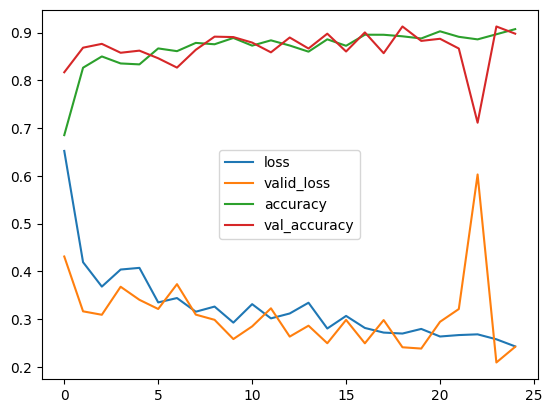

In [123]:
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="valid_loss")
plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.legend()
plt.show()

In [124]:
from tensorflow.keras.preprocessing import image
def load_im(img_path,img_height=128,img_width=128):
    img=image.load_img(img_path,target_size=(img_height,img_width))
    img_array=image.img_to_array(img)
    img_array=img_array/255.0
    img_array=np.expand_dims(img_array,axis=0)
    return img_array


In [125]:
def predicted_im(img_path,class_names):
    img_array=load_im(img_path)
    predictions=model.predict(img_array)
    predictied_cl=np.argmax(predictions,axis=1)[0]
    confidence=np.max(predictions)
    return class_names[predictied_cl],confidence
class_names=list(train_data.class_indices.keys())
print(predicted_im(r"data/cloudy/train_179.jpg",class_names*100))

1/1 [==============================] - 0s 204ms/step
('cloudy', 0.9934144)


In [126]:
print(pd.DataFrame(history.history))

        loss  accuracy  val_loss  val_accuracy
0   0.652271  0.685377  0.431137      0.817052
1   0.419226  0.826600  0.316299      0.868561
2   0.368105  0.850197  0.309089      0.876554
3   0.403845  0.835538  0.367802      0.857904
4   0.407343  0.833571  0.340420      0.862345
5   0.334960  0.867000  0.321240      0.846359
6   0.344152  0.861280  0.373212      0.826821
7   0.315511  0.878571  0.309401      0.864121
8   0.326243  0.875714  0.298523      0.891652
9   0.292656  0.888929  0.258221      0.890764
10  0.331342  0.872857  0.284752      0.879218
11  0.301538  0.883929  0.322662      0.858792
12  0.311813  0.873078  0.263377      0.889876
13  0.334324  0.860207  0.286232      0.866785
14  0.280318  0.886071  0.249450      0.897869
15  0.306703  0.872500  0.298305      0.860568
16  0.281483  0.895714  0.249282      0.900533
17  0.271792  0.895602  0.298052      0.857016
18  0.269780  0.892385  0.241025      0.912966
19  0.279458  0.887857  0.238308      0.882771
20  0.263572 

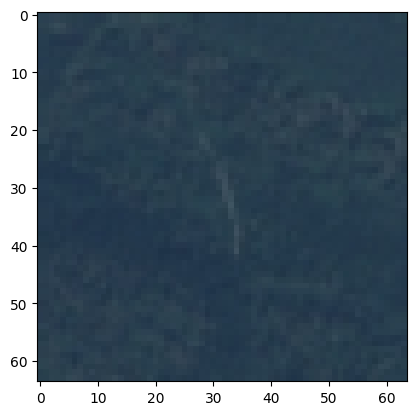

In [127]:
img=plt.imread(r"data\green_area\Forest_5.jpg")
plt.imshow(img)

In [128]:
model.save("placerecognition.h5")